In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Analyzing the dataset

In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Since there are no info about customers that start with M (Merchants).
# Lets check
df[df['nameDest'].apply(lambda x: x[0] == "M")]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [7]:
# We clearly have no information about Merchants
df[df['nameDest'].apply(lambda x: x[0] == "M")]['isFraud'].value_counts()

isFraud
0    2151495
Name: count, dtype: int64

In [8]:
# Lets remove


# Removing Merchants

In [9]:
df1 = df.copy(deep = True)

In [10]:
df1 = df1[~(df1['nameDest'].apply(lambda x: x[0] == "M"))]
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.0,51513.44,0,0


In [11]:
print(df.shape)
print(df1.shape)

(6362620, 11)
(4211125, 11)


## Check for duplicated data

In [12]:
df.duplicated().sum()

0

In [13]:
# No Duplicated data

In [14]:
# Lets Check isFlaggedFraud column

In [15]:
df1['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    4211109
1         16
Name: count, dtype: int64

In [16]:
df1[df1['isFlaggedFraud'] == 1]['isFraud'].value_counts()

isFraud
1    16
Name: count, dtype: int64

In [17]:
# We can safely remove isFlaggedFraud column since both isFraud and isFlaggedFraud column only identify Fraud transaction and have similarly detected fraudulent transaction

In [18]:
print(df1.shape)
df1.drop(columns = ['isFlaggedFraud'] ,inplace = True)
print(df1.shape)

(4211125, 11)
(4211125, 10)


In [19]:
# If you analyze data carefully 
# Since we dont have information about whether all the balance amount or transfer amounts are in same currency or not
# I am assuming they are in different currency
# that means columns - amount,oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest might be in different currency

In [20]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [21]:
print(df1.shape)
print("Unique values in nameOrig ",df1['nameOrig'].nunique())
print("Unique values in nameDest ",df1['nameDest'].nunique())

(4211125, 10)
Unique values in nameOrig  4207035
Unique values in nameDest  571961


In [22]:
# Some transactions are done by same users

# EDA

In [63]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


<Axes: xlabel='type', ylabel='isFraud'>

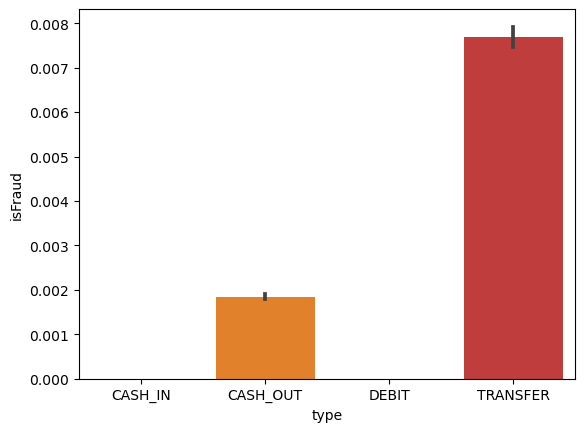

In [64]:
sns.barplot(x = df1['type'],y = df1['isFraud'])

In [ ]:
# People who does Transfer are more likely doing fraud transactions

In [69]:
sns.barplot(x = df1['nameOrig'],y = df1['isFraud'])


KeyboardInterrupt



In [73]:
df1.groupby("nameDest")['isFraud'].sum().sort_values(ascending = False).head(30)

nameDest
C650699445     2
C105660024     2
C1837027614    2
C964377943     2
C1460854172    2
C1148781766    2
C385133759     2
C1185292292    2
C1656842502    2
C1827800010    2
C1259079602    2
C200064275     2
C1366192319    2
C644163395     2
C52390890      2
C14138104      2
C1655359478    2
C1827219533    2
C1399829166    2
C2129197098    2
C505532836     2
C1497532505    2
C104038589     2
C643624257     2
C1780714769    2
C1193568854    2
C935310781     2
C2020337583    2
C410033330     2
C1669818195    2
Name: isFraud, dtype: int64

In [78]:
df1.groupby("nameDest")['isFraud'].sum().sort_values(ascending = False).head(30)

nameDest
C650699445     2
C105660024     2
C1837027614    2
C964377943     2
C1460854172    2
C1148781766    2
C385133759     2
C1185292292    2
C1656842502    2
C1827800010    2
C1259079602    2
C200064275     2
C1366192319    2
C644163395     2
C52390890      2
C14138104      2
C1655359478    2
C1827219533    2
C1399829166    2
C2129197098    2
C505532836     2
C1497532505    2
C104038589     2
C643624257     2
C1780714769    2
C1193568854    2
C935310781     2
C2020337583    2
C410033330     2
C1669818195    2
Name: isFraud, dtype: int64

# Encoding

In [23]:
df1['type'].unique()

array(['TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], dtype=object)

In [24]:
df1['type'] = df1['type'].astype('category')


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4211125 entries, 2 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            category
 2   amount          float64 
 3   nameOrig        object  
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        object  
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         int64   
dtypes: category(1), float64(5), int64(2), object(2)
memory usage: 325.3+ MB


In [26]:
encoded_df = pd.get_dummies(df1['type'],prefix = "type",drop_first= True,dtype=int)
encoded_df

,type_CASH_OUT,type_DEBIT,type_TRANSFER
2,0,0,1
3,1,0,0
9,0,1,0
10,0,1,0
15,1,0,0
...,...,...,...
6362615,1,0,0
6362616,0,0,1
6362617,1,0,0
6362618,0,0,1


In [27]:
df2 = df1.copy()
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [28]:
df2 = pd.concat([df1,encoded_df], axis = 1)

In [29]:
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_TRANSFER
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,1,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0,1,0
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,1,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,1,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,1


In [30]:
# Since steps is a time column which might not help in model building, we can safely remove it
# along type column 
# also nameOrig and nameDest are customerids column, we can safely remove them as they might not help in model building

In [31]:
df2 = df2[['type_CASH_OUT','type_DEBIT','type_TRANSFER','amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].reset_index(drop = True)

In [32]:
df2

,type_CASH_OUT,type_DEBIT,type_TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,0,1,181.00,181.00,0.00,0.00,0.00,1
1,1,0,0,181.00,181.00,0.00,21182.00,0.00,1
2,0,1,0,5337.77,41720.00,36382.23,41898.00,40348.79,0
3,0,1,0,9644.94,4465.00,0.00,10845.00,157982.12,0
4,1,0,0,229133.94,15325.00,0.00,5083.00,51513.44,0
...,...,...,...,...,...,...,...,...,...
4211120,1,0,0,339682.13,339682.13,0.00,0.00,339682.13,1
4211121,0,0,1,6311409.28,6311409.28,0.00,0.00,0.00,1
4211122,1,0,0,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
4211123,0,0,1,850002.52,850002.52,0.00,0.00,0.00,1


# Train-Test-Split

In [34]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df2.drop(columns = ['isFraud']), df2['isFraud'], random_state = 101, test_size = 0.32)

In [35]:
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((2863565, 8), (1347560, 8), (2863565,), (1347560,))

# Imbalanced dataset

In [36]:
(df2['isFraud'].value_counts()/df2.shape[0])*100

isFraud
0    99.804969
1     0.195031
Name: count, dtype: float64

In [37]:
# We have imbalanced dataset on our hands

In [37]:
from imblearn.over_sampling import SMOTE


In [44]:
pd.options.display.float_format = '{:.2f}'.format


In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
xTrain, yTrain = smote.fit_resample(xTrain, yTrain)

In [48]:
xTrain

,type_CASH_OUT,type_DEBIT,type_TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0,0,0,152880.09,21355.00,174235.09,100290.14,0.00
1,0,0,0,236054.64,2924.00,238978.64,0.00,0.00
2,0,0,0,136392.40,3593.00,139985.40,1241204.92,1104812.52
3,1,0,0,47483.34,0.00,0.00,6625974.13,6641315.52
4,0,0,0,296135.75,65681.00,361816.75,968803.21,672667.46
...,...,...,...,...,...,...,...,...
5716115,1,0,0,174761.64,174761.64,0.00,370519.13,545280.77
5716116,1,0,0,1640877.02,1640877.02,0.00,400593.26,2060312.42
5716117,1,0,0,21147.64,21147.64,0.00,16342.44,37490.08
5716118,0,0,1,10000000.00,12858737.32,2858737.32,0.00,0.00


# Model Building

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
md1 = lr.fit(xTrain,yTrain)
pred1 = md1.predict(xTest)
acc1 = accuracy_score(pred1,yTest)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
md2 = dt.fit(xTrain,yTrain)
pred2 = md2.predict(xTest)
acc2 = accuracy_score(pred2,yTest)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
md3 = rf.fit(xTrain,yTrain)
pred3 = md3.predict(xTest)
acc3 = accuracy_score(pred3,yTest)

# Bagging Classifier
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()
md4 = bg.fit(xTrain,yTrain)
pred4 = md4.predict(xTest)
acc4 = accuracy_score(pred4,yTest)

#SVM
from sklearn.svm import SVC

svm = SVC()
md5 = svm.fit(xTrain,yTrain)
pred5 = md5.predict(xTest)
acc5 = accuracy_score(pred5,yTest)

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
md6 = knn.fit(xTrain,yTrain)
pred6 = md6.predict(xTest)
acc6 = accuracy_score(pred6,yTest)

# Voting Classifier
from sklearn.ensemble import VotingClassifier


vc = VotingClassifier(estimators = [('lr',lr),('dt',dt),('rf',rf),('bg',bg),('svm',svm),('knn',knn)])
md7 = vc.fit(xTrain,yTrain)
pred7 = md7.predict(xTest)
acc7 = accuracy_score(pred7,yTest)

In [ ]:
#Train score
ac1 = accuracy_score(md1.predict(xTrain),yTrain)
ac2 = accuracy_score(md2.predict(xTrain),yTrain)
ac3 = accuracy_score(md3.predict(xTrain),yTrain)
ac4 = accuracy_score(md4.predict(xTrain),yTrain)
ac5 = accuracy_score(md5.predict(xTrain),yTrain)
ac6 = accuracy_score(md6.predict(xTrain),yTrain)
ac7 = accuracy_score(md7.predict(xTrain),yTrain)

In [ ]:
l1 = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier' , 'Bagging Classifier', 'SVM', 'KNN', 'Voting Classifier']
scorecard = pd.DataFrame(data = {"Models": l1,'Train_score':[ac1,ac2,ac3,ac4,ac5,ac6,ac7],'Test_score': [acc1,acc2,acc3,acc4,acc5,acc6,acc7]})
scorecard.set_index('Models',inplace = True)
scorecard

# Logistic regression

In [51]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
md1 = lr.fit(xTrain,yTrain)
pred1 = md1.predict(xTest)
acc1 = accuracy_score(pred1,yTest)

In [52]:
acc1

0.9278681468728666

In [53]:
ac1 = accuracy_score(md1.predict(xTrain),yTrain)
ac1

0.9547890877028474

# Decision Tree

In [54]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
md2 = dt.fit(xTrain,yTrain)
pred2 = md2.predict(xTest)
acc2 = accuracy_score(pred2,yTest)

In [55]:
acc2

0.9992022618658909

In [57]:
ac2 = accuracy_score(md2.predict(xTrain),yTrain)
ac2

1.0

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(pred2,yTest))

[[1343835      58]
 [   1017    2650]]


In [62]:
print('Test Report')
print()
print(classification_report(pred2,yTest))
print()
print('######'*5)
print()
print('Train Report')
print()
print(classification_report(md2.predict(xTrain),yTrain))

Test Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1343893
           1       0.98      0.72      0.83      3667

    accuracy                           1.00   1347560
   macro avg       0.99      0.86      0.92   1347560
weighted avg       1.00      1.00      1.00   1347560


##############################

Train Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2858060
           1       1.00      1.00      1.00   2858060

    accuracy                           1.00   5716120
   macro avg       1.00      1.00      1.00   5716120
weighted avg       1.00      1.00      1.00   5716120

